# Week 5 Activity: Hypothesis Testing


This week you will be using python to visualise some data and perform hypothesis testing. Please refer to lecture __W5.L1: Empirical Methods__.

For further reading, I suggest the following reference book, available online via University library:
+ Peter Bruce, Andrew Bruce, Peter Gedeck (2020), Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. 
<br>Link: https://bris.on.worldcat.org/oclc/1151182591

### Instructions: 

In today's session, you will be visualising and analysing two datasets. These data are stored in the following files:
+ `w5.data/data1.csv`
+ `w5.data/data2.csv`

Each dataset contains a sample of values measured from a population subject to different conditions. We consider these conditions in the abstract and name them condition "a", "b", etc. However, if you want a more concrete example, you could consider that these data are empirical outcomes from your market experiments. For instance, condition "a" could be "markets containing ZIC traders only" and condition "b" could be "markets containing ZIP traders only". Then, each value is mean profit per trader; and each row is the result of one experimental trail. 

Your task is to do the following:
1. select *one* of the datasets
2. summarise the dataset you have chosen: number of columns (i.e., number of conditions), number of instances (i.e., number of rows/trials), mean and standard deviation of each column (i.e., mean and standard deviation of each condition)
3. use a staticial test to determine whether data are normally distributed (e.g., Shapiro-Wilk or Kolmogoroc-Smirnov)
4. visualise the dataset you have chosen to understand the distribution of values under each condition. Consider using scatter plot, histogram, box-and-whisker plot, violin plot, etc.
5. use a statistical hypothesis test to determine whether there is a significant statistical difference between conditions in the dataset (e.g., t-test, ANOVA, Mann-Whitney, Kruskal-Wallis).

If you finish with time remaining, then go back and repeat the above steps using the *other* data set. 

### Getting started. Importing required python libraries

We will be using the following useful libraries to help us perform statistical analysis:

+ `SciPy`: Fundamental algorithms for scientific computing in Python - https://scipy.org
+ `Seaborn`: Statistical data visualisation - https://seaborn.pydata.org
+ `matplotlib`: visualisation with python - https://matplotlib.org
+ `statsmodels`: Functions for estimation of different statistical models - https://www.statsmodels.org/stable/index.html
+ `pandas`: For handling data - https://pandas.pydata.org/docs/getting_started/index.html

Let's begin by importing these python libraries for use today.

In [1]:
# import some useful libraries to help us wrangle data, 
# plot data, and perform statistial analysis 
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

### 1. Read in data

Select one dataset to work with. Read the dataset from the chosen csv file.

> Hint: Use `pandas` library to read a csv file into a pandas dataframe <br>
> https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Then show the top rows of the dataframe...

In [13]:
# Read in data from csv file using pandas

# Uncomment the following as required

df = pd.read_csv('w5.data/data1.csv') # read data1 to dataframe
# df = pd.read_csv('w5.data/data2.csv') # read data2 to dataframe

df.head() # show top rows of dataframe

,a,b,c
0,9.488231,14.716073,13.216140
1,11.197358,7.495907,12.922116
2,8.701403,11.570394,9.074421
3,8.610674,16.672563,10.348098
4,14.914451,11.403576,12.848107


### 2. Summarise the data

Briefly summarise the dataset. Find the following:
+ Number and name of conditions
+ Number of instances, n, of each condition
+ Mean and standard deviation of values for each condition

One approach is to open the raw data in the csv file and use Excel to calculate these values. Alternatively, you can use python code:


In [14]:
# Calculate the summary statistics for each condition
summary = df.describe()

# Print the summary statistics
summary


,a,b,c
count,15.000000,15.000000,15.000000
mean,11.086026,13.104422,12.611373
std,2.186726,3.110275,2.229636
min,6.759447,7.495907,9.074421
25%,9.860250,11.277111,11.438718
50%,10.704365,12.810303,12.573160
75%,12.817030,14.262752,13.858641
max,14.914451,20.622360,16.400363


What do these summary values tell us? Are the profits for all conditions the same? Do some conditions lead to higher profits? Is it possible for us to tell from these values alone?

### 3. Determine whether data are normally distributed

Summary statistics, in isolation, only tell us so much. If we want to accurately analyse these data we need to understand their distributions. In particular, if we want to perform correct hypothesis testing, we must first determine whether the data is (approximately) normally distributed.

The __Shaprio-Wilk__ test and the __Kolmogorov-Smirnov__ test for goodness of fit can help us here: 

> The Shaprio-Wilk test tests the null hypothesiss that the data was drawn from a normal distribution. 
> `stats.shapiro(x)` returns tuple (A,B) where A = test statistic and B = p-value for the hypothesis test. 
> If p-value < 0.05, we reject the null hypothesis, i.e., the data is not drawn from an (approximately) normal distribution 
> If p-value >= 0.05 we cannot reject the null hypothesis that the data is drawn from an approximately normal distribution.

> The Kolmogorov-Smirnov test tests for goodness of fit to a standard normal distribution. 
> To use this test, it is necessary to first normalise our data (to have mean=0 and variance=1).
> To normalise: for each value, subtract the mean, then divide by the standard deviation <br>

There are methods in the `stats` package in `scipy` that enable us to perform these tests:

+ Shapiro-Wilk test for normality: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html <br>
+ Kolmogorov-Smirnov test for goodness of fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

Decide which test you will use, then perform the test on each column of your data to see if the data are approximately normally distributed for each condition. What is the p-value for each column? Using this p-value, determine whether your data are (approximately) normally distributed. 

In [15]:
from scipy import stats

# Perform Shapiro-Wilk test for normality on each column
shapiro_results = {}
for column in df.columns:
    stat, p = stats.shapiro(df[column])
    shapiro_results[column] = {'Test Statistic': stat, 'p-value': p}

shapiro_results


{'a': {'Test Statistic': 0.9824637770652771, 'p-value': 0.983559787273407},
 'b': {'Test Statistic': 0.9590163826942444, 'p-value': 0.6753044724464417},
 'c': {'Test Statistic': 0.9619023203849792, 'p-value': 0.7254215478897095}}

Using the p-values from your test, above, you can now determine if your data is (approximately) normally distributed. Make a note as you will use this information later.

### 4. Visualise the data

You have determined if your data is normally distributed, or not, using a statistical test. However, it is good practice to always visualise your data. 

#### Visualising normality

Visualisations can also help us to determine the normality of data: are the data unimodal, roughly symmetric, tails not too heavy?

Often, to best understand your data, it is a good idea to visualise it in different ways. 

Here are some common approaches for visualising (lack of) normality in data:

> A __QQ plot__ (formally, a quantile-quantile plot) can be used to visually compare data with a normal distribution. 
> You can use `statsmodels` to create a QQ plot. <br>
> https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html <br>
> The QQ plot plots data from the distribtion against a normal distribution. 
> If the sample data falls close to the red line (showing x=y), then the data is approximately normal. 
> Note that you should normalise your data first (to have mean 0 and standard deviation 1). <br>

> You can plot your distributions using a histogram or kernel density estimation (KDE) to see the distribution shape. 
> If the data is roughly bell-shaped you have (approximately) normal distribution.
> `Seaborn` is a useful library for plotting these graphs: <br> 
> + A __histogram__ is a classic visualization tool that represents the distribution of 
> one or more variables by counting the number of observations that fall within discrete bins: <br>
> https://seaborn.pydata.org/generated/seaborn.histplot.html
> + __Kernel density estimation__ is useful for plotting multiple distributions on one set of axes: <br> 
> https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

Now try to visualise your data using a QQ plot and/or histograms and/or a KDE plot.


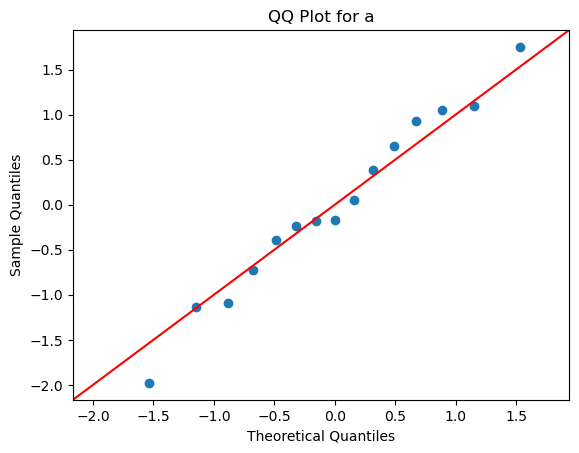

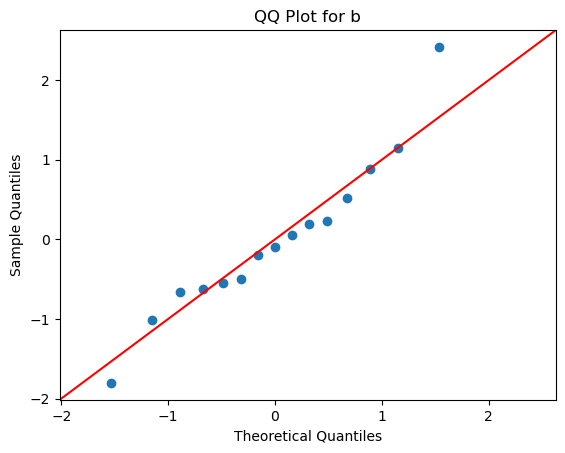

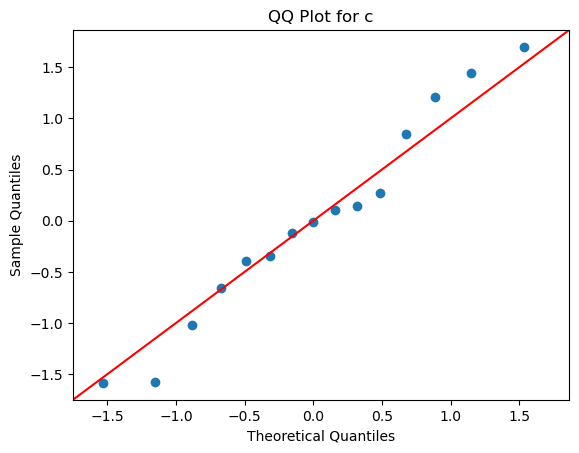

c:\Users\tibit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


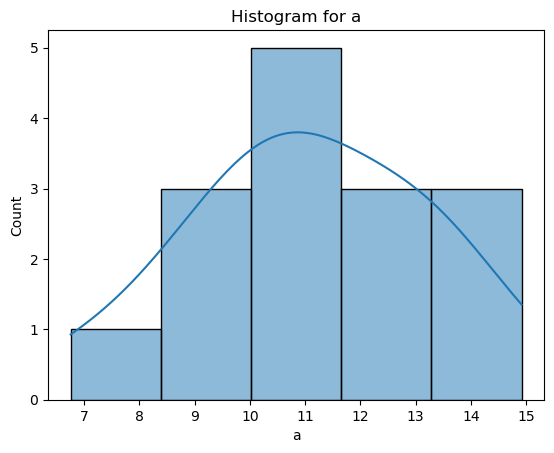

c:\Users\tibit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


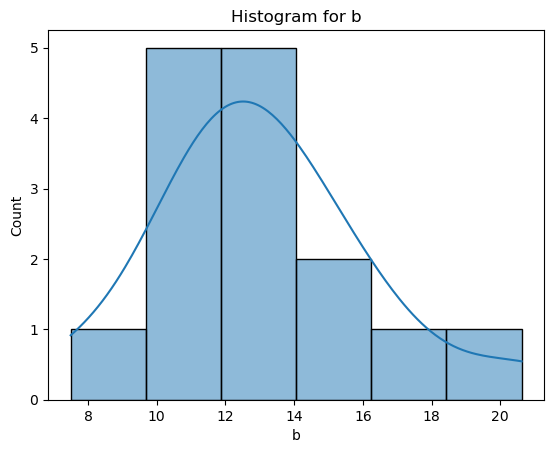

c:\Users\tibit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


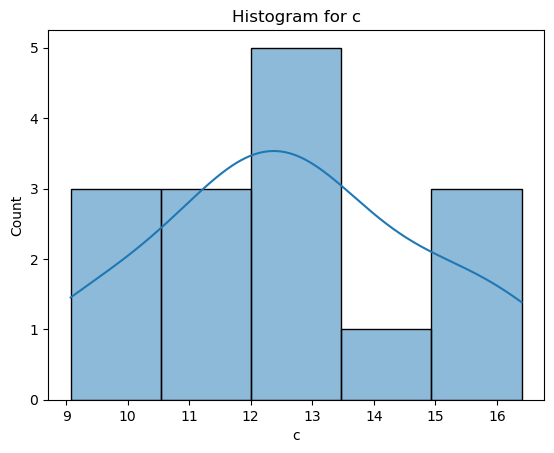

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Normalize the data
normalized_df = (df - df.mean()) / df.std()

# Create a QQ plot for each column
for column in df.columns:
    sm.qqplot(normalized_df[column], line='45')
    plt.title(f'QQ Plot for {column}')
    plt.show()

# Create a histogram for each column
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

From your plots, does it look like your data is approximately normal? 

How does this compare with your finding from your normality test performed in part 3? 

#### Comparing distributions visually 

The data contains results of experiments under multiple conditions. We can use visualisations to compare the results of each condition. 

Attempt the following three approaches to visually compare your data:
+ Create a __barplot__ of mean and confidence interval: https://seaborn.pydata.org/generated/seaborn.barplot.html
+ Create a __box plot__ (or box-and-whisker plot) showing inter-quartile ranges: https://seaborn.pydata.org/generated/seaborn.boxplot.html
+ Create a __violin plot__: https://seaborn.pydata.org/generated/seaborn.violinplot.html

C:\Users\tibit\AppData\Local\Temp\ipykernel_18160\847370425.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, ci='sd')


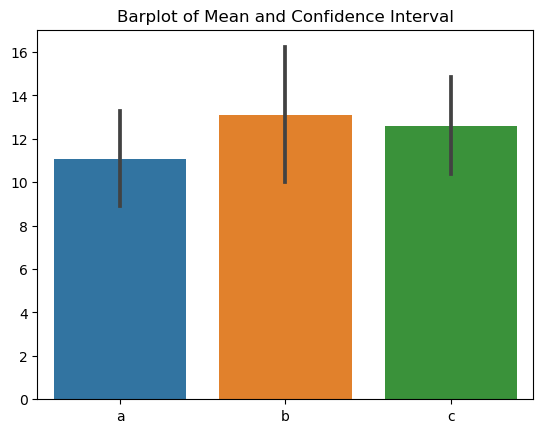

In [17]:
# Create a barplot of mean and confidence interval
sns.barplot(data=df, ci='sd')
plt.title('Barplot of Mean and Confidence Interval')
plt.show()

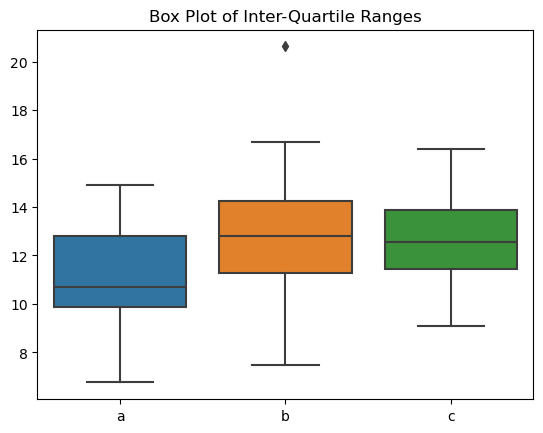

In [18]:
# Create a box plot showing inter-quartile ranges
sns.boxplot(data=df)
plt.title('Box Plot of Inter-Quartile Ranges')
plt.show()

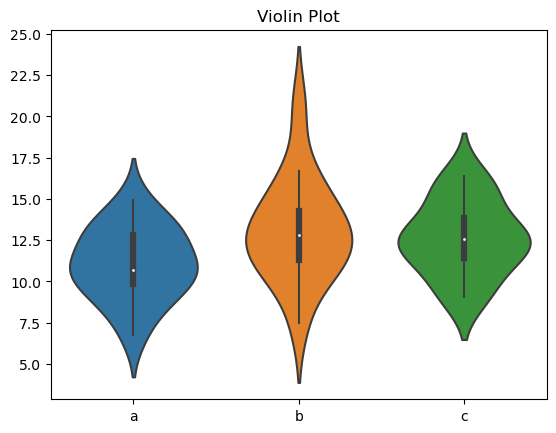

In [19]:
# Create a violin plot
sns.violinplot(data=df)
plt.title('Violin Plot')
plt.show()

Which visual presents the most information? Which presents the least?

### 5. Hypothesis testing

So, now you have determind whether or not the data is normal and you have visualised the comparative distributions. You now have a good idea about whether profits appear to be similar under all conditions, or whether some conditions appear to lead to grater profits.

However, to know for sure whether a change in condition results in a change in profits, you need to perform a statistical test.

First, you must set up a null hypothsis. You then perform a statistical test to generate a p-value. If p-value < 0.05 then you can reject the null hypothsis. 

Depending on your data, consider one of the following four hypothesis tests:

+ __t-test__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
+ __ANOVA__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
+ __Mann-Whitney__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html.
+ __Kruskal-Wallis__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal. 

Decide which test is appropriate and then write code to perform the test, below.


In [20]:
from scipy import stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*[df[column] for column in df.columns])
f_statistic, p_value

(2.564892866292887, 0.08892632126622414)

From the result of your hypothesis test, what can you say about the data?

### Explore

If you have completed the above for one dataset, now go back to the start and attempt it with the other dataset.

If you have completed for both datasets, now try some other methods and read around the subject more.

[END OF DOCUMENT]